## Import module

In [1]:
import numpy as np  # ÏàòÌïôÏ†Å Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú numpy ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pandas as pd  # Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è CSV ÌååÏùº ÏûÖÏ∂úÎ†•ÏùÑ ÏúÑÌïú pandas ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

import os  # Ïö¥ÏòÅ Ï≤¥Ï†úÏôÄÏùò ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÏúÑÌïú os ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

# os.walkÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ§Ï†ïÌïú ÎîîÎ†âÌÜ†Î¶¨Ïùò Î™®Îì† ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨Î•º ÌÉêÏÉâ
for dirname, _, filenames in os.walk('./severstal-steel-defect-detection'):
    # Ìï¥Îãπ ÎîîÎ†âÌÜ†Î¶¨Ïùò ÌååÏùº Î™©Î°ùÏùÑ Í∞ÄÏ†∏Ïò¥
    for filename in filenames:
        # Í∞Å ÌååÏùºÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°úÎ•º Ï∂úÎ†•
        print(os.path.join(dirname, filename))
        break  # Ï≤´ Î≤àÏß∏ ÌååÏùº Í≤ΩÎ°úÎßå Ï∂úÎ†•ÌïòÍ≥† Î∞òÎ≥µÎ¨∏ Ï¢ÖÎ£å

./severstal-steel-defect-detection\sample_submission.csv
./severstal-steel-defect-detection\test_images\0000f269f.jpg
./severstal-steel-defect-detection\train_images\0002cc93b.jpg


In [2]:
# Î™®Îìà ÏÑ§Ïπò
# !pip install ultralytics -q

In [2]:
DATASET_PATH = os.path.join(".", "severstal-steel-defect-detection")  # Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∏∞Î≥∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
TRAIN_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "train_images")  # ÌïôÏäµÏö© Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú ÏÑ§Ï†ï
TEST_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "test_images")  # ÌÖåÏä§Ìä∏Ïö© Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú ÏÑ§Ï†ï

init_dir = os.getcwd()  # ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨Î•º Ï†ÄÏû•

In [3]:
import glob  # ÌååÏùº Í≤ΩÎ°ú Î∞è Ïù¥Î¶Ñ Ìå®ÌÑ¥ÏùÑ Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌïú glob ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

# ÌïôÏäµ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ùÏùÑ globÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏ†∏Ïò§Í≥†, Ïù¥Î¶ÑÏùÑ Ï†ïÎ†¨
train_img_names = sorted(glob.glob(TRAIN_IMAGE_DATASET_PATH + '/' + "*.jpg"))

# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ùÏùÑ globÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏ†∏Ïò§Í≥†, Ïù¥Î¶ÑÏùÑ Ï†ïÎ†¨
test_img_names = sorted(glob.glob(TEST_IMAGE_DATASET_PATH + '/' + "*.jpg"))

# ÌïôÏäµ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í∞úÏàòÎ•º Ï∂úÎ†•
print(len(train_img_names))

# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í∞úÏàòÎ•º Ï∂úÎ†•
print(len(test_img_names))


12568
5506


In [4]:
train_df_b = pd.read_csv(DATASET_PATH + "/train.csv")  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú CSV ÌååÏùºÏùÑ ÏùΩÏñ¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î°úÎìú
train_df_b['ClassId'] = train_df_b['ClassId'].astype(int)  # 'ClassId' Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò

In [5]:
# train_df_b["ClassId"].value_counts().plot(kind = 'bar')
# Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: 'ClassId' Ïó¥Ïùò Í∞íÏù¥ ÏñºÎßàÎÇò ÏûêÏ£º ÎÇòÌÉÄÎÇòÎäîÏßÄ ÏÑ∏Ïñ¥ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî

# train_df_b.groupby(['ClassId'])['ClassId'].count()
# Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: 'ClassId'Î°ú Í∑∏Î£πÌôîÌïòÏó¨ Í∞Å Í∑∏Î£πÏùò 'ClassId' ÏàòÎ•º ÏÑ∏Îäî ÏΩîÎìú

train_df_b["ClassId"].value_counts()  # 'ClassId' Ïó¥Ïùò Í∞íÏù¥ ÎÇòÌÉÄÎÇòÎäî ÎπàÎèÑÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î∞òÌôò

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

In [6]:
# train_df_b.groupby(['ClassId'])['ClassId'].count().sum()
# Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: 'ClassId'Î°ú Í∑∏Î£πÌôîÌïú ÌõÑ Í∞Å Í∑∏Î£πÏùò 'ClassId' ÏàòÎ•º ÏÑ∏Í≥†, Í∑∏ ÏàòÏùò Ï¥ùÌï©ÏùÑ Í≥ÑÏÇ∞

train_df_b["ClassId"].value_counts().sum()  # 'ClassId' Ïó¥Ïùò Í∞í ÎπàÎèÑÏàòÏùò Ï¥ùÌï©ÏùÑ Í≥ÑÏÇ∞

7095

In [7]:
train_df_b['ImageId'].nunique()  # 'ImageId' Ïó¥ÏóêÏÑú Í≥†Ïú†Ìïú Í∞íÏùò Í∞úÏàòÎ•º Í≥ÑÏÇ∞

6666

In [8]:
# train_df_b.groupby(['ImageId'])['ImageId'].count().max()
# Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: 'ImageId'Î°ú Í∑∏Î£πÌôîÌïú ÌõÑ Í∞Å Í∑∏Î£πÏóêÏÑú 'ImageId'Ïùò Í∞úÏàòÎ•º ÏÑ∏Í≥†, Í∑∏ Ï§ë Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Î∞òÌôò

train_df_b["ImageId"].value_counts().max()  # 'ImageId' Ïó¥ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎÇòÌÉÄÎÇòÎäî Í∞íÏùò ÎπàÎèÑÏàòÎ•º Î∞òÌôò

3

In [42]:
train_df_b['ImageId'].value_counts().value_counts()

count
1    6239
2     425
3       2
Name: count, dtype: int64

In [9]:
train_df_b.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 1).count()  # 'ImageId'Î°ú Í∑∏Î£πÌôîÌïú ÌõÑ, Í∑∏Î£π ÌÅ¨Í∏∞Í∞Ä 1Î≥¥Îã§ ÌÅ∞ 'ImageId'Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Í∑∏ ÏàòÎ•º Í≥ÑÏÇ∞

856

In [10]:
train_df_b.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 2)  # 'ImageId'Î°ú Í∑∏Î£πÌôîÌïú ÌõÑ, Í∑∏Î£π ÌÅ¨Í∏∞Í∞Ä 2Î≥¥Îã§ ÌÅ∞ 'ImageId'Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Î∞òÌôò

6101    db4867ee8.jpg
6102    db4867ee8.jpg
6103    db4867ee8.jpg
6650    ef24da2ba.jpg
6651    ef24da2ba.jpg
6652    ef24da2ba.jpg
Name: ImageId, dtype: object

In [11]:
train_df_b.loc[train_df_b['ImageId'].isin(['db4867ee8.jpg'])]  # 'ImageId'Í∞Ä 'db4867ee8.jpg'Ïù∏ Î™®Îì† ÌñâÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Î∞òÌôò

ImageId  ClassId  \
6101  db4867ee8.jpg        1   
6102  db4867ee8.jpg        2   
6103  db4867ee8.jpg        3   

                                          EncodedPixels  
6101  349941 2 350194 6 350447 11 350700 15 350953 1...  
6102  354411 17 354634 50 354857 82 355096 99 355351...  
6103                              233729 3008 236801 64

In [12]:
train_df_b.groupby(['ImageId', 'ClassId'])['ImageId'].count().max()  # 'ImageId'ÏôÄ 'ClassId'Î°ú Í∑∏Î£πÌôîÌïú ÌõÑ, Í∞Å Í∑∏Î£πÏùò 'ImageId' Í∞úÏàòÎ•º ÏÑ∏Í≥† Í∑∏ Ï§ë Í∞ÄÏû• ÌÅ∞ Í∞íÏùÑ Î∞òÌôò

1

In [44]:
train_df_b.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

In [13]:
train_df = train_df_b.pivot(index='ImageId', columns='ClassId', values='EncodedPixels')  # 'ImageId'Î•º Ïù∏Îç±Ïä§Î°ú, 'ClassId'Î•º Ïó¥Î°ú, 'EncodedPixels'ÏùÑ Í∞íÏúºÎ°ú ÌïòÎäî ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
train_df['count'] = train_df.count(axis=1)  # Í∞Å 'ImageId'Ïóê ÎåÄÌï¥ Í≤∞Ï∏°Í∞íÏù¥ ÏïÑÎãå 'EncodedPixels'Ïùò Í∞úÏàòÎ•º ÏÑ∏Ïñ¥ 'count' Ïó¥Ïóê Ï†ÄÏû•
train_df  # Í≤∞Í≥º ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ Ï∂úÎ†•

ClassId                                                        1    2  \
ImageId                                                                 
0002cc93b.jpg  29102 12 29346 24 29602 24 29858 24 30114 24 3...  NaN   
0007a71bf.jpg                                                NaN  NaN   
000a4bcdd.jpg  37607 3 37858 8 38108 14 38359 20 38610 25 388...  NaN   
000f6bf48.jpg                                                NaN  NaN   
0014fce06.jpg                                                NaN  NaN   
...                                                          ...  ...   
ffcf72ecf.jpg                                                NaN  NaN   
fff02e9c5.jpg                                                NaN  NaN   
fffe98443.jpg                                                NaN  NaN   
ffff4eaa8.jpg                                                NaN  NaN   
ffffd67df.jpg                                                NaN  NaN   

ClassId                                                        3  \
ImageId                                                            
0002cc93b.jpg                                                NaN   
0007a71bf.jpg  18661 28 18863 82 19091 110 19347 110 19603 11...   
000a4bcdd.jpg                                                NaN   
000f6bf48.jpg                                                NaN   
0014fce06.jpg  229501 11 229741 33 229981 55 230221 77 230468...   
...                                                          ...   
ffcf72ecf.jpg  121911 34 122167 101 122422 169 122678 203 122...   
fff02e9c5.jpg  207523 3 207777 9 208030 15 208283 22 208537 2...   
fffe98443.jpg  105929 5 106177 14 106424 24 106672 33 106923 ...   
ffff4eaa8.jpg  16899 7 17155 20 17411 34 17667 47 17923 60 18...   
ffffd67df.jpg  30931 43 31103 127 31275 211 31489 253 31745 2...   

ClassId                                                        4  count  
ImageId                                                                  
0002cc93b.jpg                                                NaN      1  
0007a71bf.jpg                                                NaN      1  
000a4bcdd.jpg                                                NaN      1  
000f6bf48.jpg  131973 1 132228 4 132483 6 132738 8 132993 11 ...      1  
0014fce06.jpg                                                NaN      1  
...                                                          ...    ...  
ffcf72ecf.jpg                                                NaN      1  
fff02e9c5.jpg                                                NaN      1  
fffe98443.jpg                                                NaN      1  
ffff4eaa8.jpg                                                NaN      1  
ffffd67df.jpg                                                NaN      1  

[6666 rows x 5 columns]

In [14]:
import cv2  # OpenCV ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏, Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ÏôÄ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ ÏûëÏóÖÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨

# Ï£ºÏñ¥ÏßÑ Ìñâ ID(row_id)ÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(df)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï¥Îãπ ÎßàÏä§ÌÅ¨Î•º ÏùΩÏñ¥Îì§Ïù¥Îäî Ìï®Ïàò
def read_image_with_masks(row_id, df):
    
    fname_o = df.iloc[row_id].name  # Ï£ºÏñ¥ÏßÑ ÌñâÏùò Ïù∏Îç±Ïä§ Í∞í, Ï¶â Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏Ïò¥
    fname = TRAIN_IMAGE_DATASET_PATH + '/' + fname_o  # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°ú ÏÉùÏÑ±
    onlyname = fname_o.split('.')[0]  # ÌååÏùº Ïù¥Î¶ÑÏóêÏÑú ÌôïÏû•ÏûêÎ•º Ï†úÍ±∞Ìïú ÏàúÏàò Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏Ïò¥
    
    labels = df.iloc[row_id][:4]  # Ï£ºÏñ¥ÏßÑ ÌñâÏóêÏÑú Ï≤´ 4Í∞úÏùò ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî Î†àÏù¥Î∏îÎì§ÏùÑ Í∞ÄÏ†∏Ïò¥
    image = cv2.imread(fname)  # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏùΩÏñ¥Ïò¥
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ïù¥ÎØ∏ÏßÄÎ•º BGRÏóêÏÑú RGBÎ°ú ÏÉâÏÉÅ Î≥ÄÌôò
    shape = image.shape  # Ïù¥ÎØ∏ÏßÄÏùò ÌòïÌÉú(ÎÜíÏù¥, ÎÑàÎπÑ, Ï±ÑÎÑê Ïàò)Î•º Í∞ÄÏ†∏Ïò¥

    list_names = []  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    list_with_all_masks = []  # Î™®Îì† ÎßàÏä§ÌÅ¨Î•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî

    # Í∞Å ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏóê ÎåÄÌï¥ Î∞òÎ≥µ
    for classname, label in enumerate(labels.values):
        if label is not np.nan:  # Î†àÏù¥Î∏îÏù¥ NaNÏù¥ ÏïÑÎãå Í≤ΩÏö∞ÏóêÎßå Ï≤òÎ¶¨
            string_array = label.rstrip().split()  # Î†àÏù¥Î∏î Î¨∏ÏûêÏó¥ÏùÑ Í≥µÎ∞±ÏúºÎ°ú ÎÇòÎàÑÏñ¥ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
            int_array = [int(string) for string in string_array]  # Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏Î•º Ï†ïÏàò Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
            binary_mask = create_mask(int_array, shape)  # Ï†ïÏàò Î¶¨Ïä§Ìä∏ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌòïÌÉúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
            list_with_all_masks.append(binary_mask)  # ÏÉùÏÑ±Îêú ÎßàÏä§ÌÅ¨Î•º Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
            list_names.append(int(classname))  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
                
    return fname, onlyname, image, list_with_all_masks, list_names  # ÌååÏùº Ïù¥Î¶Ñ, Ïù¥ÎØ∏ÏßÄ Ïù¥Î¶Ñ, Ïù¥ÎØ∏ÏßÄ, ÎßàÏä§ÌÅ¨ Î¶¨Ïä§Ìä∏, ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏Î•º Î∞òÌôò

# Ï£ºÏñ¥ÏßÑ Ï†ïÏàò Î∞∞Ïó¥Í≥º Ïù¥ÎØ∏ÏßÄ ÌòïÌÉúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î∞îÏù¥ÎÑàÎ¶¨ ÎßàÏä§ÌÅ¨Î•º ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
def create_mask(int_array, shape):
    
    result = np.zeros((shape[0], shape[1]), dtype=np.float32)  # Ïù¥ÎØ∏ÏßÄÏôÄ ÎèôÏùºÌïú ÌòïÌÉúÏùò 0ÏúºÎ°ú Ï±ÑÏõåÏßÑ Í≤∞Í≥º Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    positions = map(int, int_array[0::2])  # Ï†ïÏàò Î∞∞Ïó¥ÏóêÏÑú ÏãúÏûë ÏúÑÏπòÎ•º Í∞ÄÏ†∏Ïò¥ (ÏßùÏàò Ïù∏Îç±Ïä§)
    length = map(int, int_array[1::2])  # Ï†ïÏàò Î∞∞Ïó¥ÏóêÏÑú Í∏∏Ïù¥Î•º Í∞ÄÏ†∏Ïò¥ (ÌôÄÏàò Ïù∏Îç±Ïä§)
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)  # Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Ïóê Ìï¥ÎãπÌïòÎäî 0ÏúºÎ°ú Ï±ÑÏõåÏßÑ 1Ï∞®Ïõê Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî

    # Í∞Å ÏãúÏûë ÏúÑÏπòÏôÄ Í∏∏Ïù¥Ïóê ÎåÄÌï¥ Î∞òÎ≥µ
    for pos, le in zip(positions, length):
        mask[pos:(pos + le)] = 1  # ÎßàÏä§ÌÅ¨ Î∞∞Ïó¥Ïùò Ìï¥Îãπ ÏúÑÏπòÏóê 1ÏùÑ Ï±ÑÏõåÏÑú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±

    result[:, :] = mask.reshape(shape[0], shape[1], order='F')  # 1Ï∞®Ïõê ÎßàÏä§ÌÅ¨ Î∞∞Ïó¥ÏùÑ 2Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Í≤∞Í≥º Î∞∞Ïó¥Ïóê Ï±ÑÏõÄ
    
    binary_mask = result.astype(np.uint8)  # Í≤∞Í≥º Î∞∞Ïó¥ÏùÑ 8ÎπÑÌä∏ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Î∞îÏù¥ÎÑàÎ¶¨ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
    return binary_mask  # ÏÉùÏÑ±Îêú Î∞îÏù¥ÎÑàÎ¶¨ ÎßàÏä§ÌÅ¨Î•º Î∞òÌôò


In [15]:
# ÎßàÏä§ÌÅ¨ÏôÄ ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Î∞õÏïÑÏÑú YOLO Ïä§ÌÉÄÏùºÏùò ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Ï¢åÌëúÏôÄ ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
def convert_masks_to_xy(masks, class_labels):

    list_with_all_masks = []  # Î™®Îì† ÎßàÏä§ÌÅ¨Ïùò Ìè¥Î¶¨Í≥§ Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    list_names = []  # Í∞Å ÎßàÏä§ÌÅ¨Ïóê Ìï¥ÎãπÌïòÎäî ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    
    for i, mask in enumerate(masks):  # Í∞Å ÎßàÏä§ÌÅ¨ÏôÄ Ìï¥Îãπ Ïù∏Îç±Ïä§Î•º Î∞òÎ≥µ
        xy_arr = convert_mask_to_polygons(mask)  # ÎßàÏä§ÌÅ¨Î•º Ìè¥Î¶¨Í≥§ Ï¢åÌëúÎ°ú Î≥ÄÌôò
        for xy_sequence in xy_arr:  # Í∞Å Ìè¥Î¶¨Í≥§ Ï¢åÌëú ÏãúÌÄÄÏä§Î•º Î∞òÎ≥µ
            list_with_all_masks.append(xy_sequence)  # Ìè¥Î¶¨Í≥§ Ï¢åÌëúÎ•º Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
            list_names.append(int(class_labels[i]))  # Ìï¥Îãπ Ìè¥Î¶¨Í≥§Ïùò ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
            
    return list_with_all_masks, list_names  # Ìè¥Î¶¨Í≥§ Ï¢åÌëú Î¶¨Ïä§Ìä∏ÏôÄ ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î Î¶¨Ïä§Ìä∏ Î∞òÌôò

def convert_mask_to_polygons(binary_mask) -> list[list[int | float]]:
    """ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î™©Ï†ÅÏùÑ ÏúÑÌï¥ YOLO Ïä§ÌÉÄÏùºÏùò Ï£ºÏÑù Î™©Î°ùÏùÑ Î∞òÌôò.
    [
        [x1, y1, x2, y2, ..., xn, yn], # object_0
        [x1, y1, x2, y2, ..., xn, yn], # object_1
        ...,
        [x1, y1, x2, y2, ..., xn, yn] # object_m
    ]
    """
    annotations = []  # YOLO Ïä§ÌÉÄÏùºÏùò Ï£ºÏÑùÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
    # Î∞îÏù¥ÎÑàÎ¶¨ ÎßàÏä§ÌÅ¨ÏóêÏÑú Ïô∏Í≥ΩÏÑ†(Ïú§Í≥ΩÏÑ†)ÏùÑ Ï∞æÏùå. cv2.RETR_EXTERNALÏùÄ Í∞ÄÏû• Ïô∏Î∂Ä Ïú§Í≥ΩÎßå Ï∞æÏùå.
    # cv2.CHAIN_APPROX_TC89_KCOSÎäî Ïú§Í≥ΩÏÑ†ÏùÑ Îã®ÏàúÌôîÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò.

    wh = np.flip(np.array(binary_mask.shape))  # ÎßàÏä§ÌÅ¨Ïùò ÎÑàÎπÑÏôÄ ÎÜíÏù¥Î•º Í∞ÄÏ†∏ÏôÄÏÑú Î∞∞Ïó¥Ïùò ÏàúÏÑúÎ•º Îí§ÏßëÏùå (Ï†ïÍ∑úÌôîÎ•º ÏúÑÌï¥)
    
    for contour in contours:  # Í∞Å Ïú§Í≥ΩÏÑ†Ïóê ÎåÄÌï¥ Î∞òÎ≥µ
        epsilon = 0.001 * cv2.arcLength(contour, True)  # Ïú§Í≥ΩÏÑ†Ïùò Ìò∏ Í∏∏Ïù¥Ïùò 0.1%Î•º ÌóàÏö© Ïò§Ï∞®Î°ú ÏÇ¨Ïö©ÌïòÏó¨ Ïú§Í≥ΩÏÑ†ÏùÑ Í∑ºÏÇ¨Ìôî
        contour_approx = cv2.approxPolyDP(contour, epsilon, True)  # Í∑ºÏÇ¨ÌôîÎêú Îã§Í∞ÅÌòïÏùÑ ÏÉùÏÑ±
        
        contour_approx = contour_approx / wh  # Ïú§Í≥ΩÏÑ† Ï¢åÌëúÎ•º ÎÑàÎπÑÏôÄ ÎÜíÏù¥Î°ú Ï†ïÍ∑úÌôîÌïòÏó¨ 0-1 Î≤îÏúÑÎ°ú Î≥ÄÌôò
        
        polygon = contour_approx.flatten().tolist()  # Ï†ïÍ∑úÌôîÎêú Ï¢åÌëúÎ•º 1Ï∞®Ïõê Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÏó¨ YOLO ÌòïÏãùÏúºÎ°ú ÎßåÎì¶
        annotations.append(polygon)  # Îã§Í∞ÅÌòïÏùÑ Ï£ºÏÑù Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
    
    return annotations  # ÏÉùÏÑ±Îêú YOLO Ïä§ÌÉÄÏùºÏùò Ï£ºÏÑù Î¶¨Ïä§Ìä∏ Î∞òÌôò
    

In [16]:
import matplotlib.pyplot as plt  # Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú matplotlib ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

def visualize(image, keypoints):
    # Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•Î∞õÏïÑ Ï£ºÏñ¥ÏßÑ ÌÇ§Ìè¨Ïù∏Ìä∏(Îã§Í∞ÅÌòï Ï¢åÌëú)Î•º Ïù¥ÎØ∏ÏßÄÏóê ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌëúÏãúÌïòÎäî Ìï®Ïàò
    
    h, w = image.shape[:2]  # Ïù¥ÎØ∏ÏßÄÏùò ÎÜíÏù¥ÏôÄ ÎÑàÎπÑÎ•º Ï∂îÏ∂ú
    cpy = image.copy()  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏ†ïÌïòÏßÄ ÏïäÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
    
    for keypoint in keypoints:  # Í∞Å ÌÇ§Ìè¨Ïù∏Ìä∏Ïóê ÎåÄÌï¥ Î∞òÎ≥µ
        poly = np.asarray(keypoint, dtype=np.float16).reshape(-1, 2)  # ÌÇ§Ìè¨Ïù∏Ìä∏Î•º numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌïòÍ≥†, (x, y) Ï¢åÌëúÎ°ú Ïû¨Íµ¨ÏÑ±
        poly *= [w, h]  # Îã§Í∞ÅÌòï Ï¢åÌëúÎ•º Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Ïóê ÎßûÍ≤å Ïä§ÏºÄÏùº Ï°∞Ï†ï
        
        cv2.polylines(cpy, [poly.astype('int')], True, (255, 0, 0), 2)  # Îã§Í∞ÅÌòïÏùÑ Ïù¥ÎØ∏ÏßÄÏóê Í∑∏Î†§Ï§å. ÌååÎûÄÏÉâ(BGR: 255, 0, 0)ÏúºÎ°ú Í∑∏Î¶¨Î©∞, ÎëêÍªòÎäî 2ÌîΩÏÖÄ
    
    plt.figure(figsize=(12, 12))  # Ï∂úÎ†•Ìï† ÌîåÎ°ØÏùò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ï
    plt.axis('off')  # Ï∂ïÏùÑ Ïà®ÍπÄ
    plt.imshow(cpy)  # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•


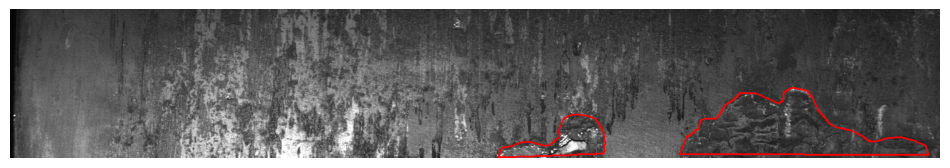

In [17]:
from PIL import Image, ImageDraw  # PIL (Python Imaging Library) ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú ImageÏôÄ ImageDraw Î™®ÎìàÏùÑ ÏûÑÌè¨Ìä∏

row_id = 13  # ÏãúÍ∞ÅÌôîÌï† Îç∞Ïù¥ÌÑ∞Ïùò Ìñâ ID ÏÑ§Ï†ï

# Ï£ºÏñ¥ÏßÑ Ìñâ IDÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(train_df)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï¥Îãπ ÎßàÏä§ÌÅ¨, ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ ÏùΩÏñ¥Ïò¥
fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df)

# ÎßàÏä§ÌÅ¨Î•º Îã§Í∞ÅÌòï Ï¢åÌëúÎ°ú Î≥ÄÌôòÌïòÍ≥†, Ìï¥Îãπ ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Î∞òÌôò
keypoints, class_labels = convert_masks_to_xy(masks, class_labels)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Îã§Í∞ÅÌòï Ï¢åÌëúÎ•º Í∑∏Î†§ ÏãúÍ∞ÅÌôî
visualize(image, keypoints)

# Ï£ºÏÑù Ï≤òÎ¶¨Îêú Î∂ÄÎ∂Ñ: PILÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥ÎØ∏ÏßÄÏôÄ Îã§Í∞ÅÌòï Ï¢åÌëúÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî ÎåÄÏïà Î∞©Î≤ï
# img = Image.fromarray(image)  # Numpy Î∞∞Ïó¥ ÌòïÏãùÏùò Ïù¥ÎØ∏ÏßÄÎ•º PIL Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôò
# h, w = image.shape[:2]  # Ïù¥ÎØ∏ÏßÄÏùò ÎÜíÏù¥ÏôÄ ÎÑàÎπÑÎ•º Ï∂îÏ∂ú
# draw = ImageDraw.Draw(img)  # Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ Draw Í∞ùÏ≤¥ ÏÉùÏÑ±
# for polygon in keypoints:  # Í∞Å Îã§Í∞ÅÌòï Ï¢åÌëúÏóê ÎåÄÌï¥ Î∞òÎ≥µ
#     draw.polygon(polygon, outline=(0,255,0), width=5)  # Îã§Í∞ÅÌòïÏùÑ ÎÖπÏÉâ(0, 255, 0)ÏúºÎ°ú Í∑∏Î†§Ï§å, ÏÑ† ÎÑàÎπÑÎäî 5ÌîΩÏÖÄ
# img  # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•


In [18]:
from sklearn.model_selection import train_test_split  # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏúÑÌïú scikit-learn ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú train_test_split Ìï®Ïàò ÏûÑÌè¨Ìä∏

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(train_df)ÏùÑ ÌïôÏäµ(train)Í≥º Í≤ÄÏ¶ù(validation) ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†
train_df_n, val_df_n = train_test_split(
    train_df,  # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    test_size=0.1,  # Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïùò ÌÅ¨Í∏∞Î•º Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 10%Î°ú ÏÑ§Ï†ï
    stratify=train_df["count"],  # 'count' Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï∏µÌôî ÏÉòÌîåÎßÅ(stratified sampling)ÏùÑ ÏàòÌñâ
    random_state=54  # ÎûúÎç§ ÏãúÎìú Í≥†Ï†ïÏúºÎ°ú Í≤∞Í≥º Ïû¨ÌòÑÏÑ± ÌôïÎ≥¥
)

# Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÎåÄÏ≤¥ ÏΩîÎìú:
# train_df_n, val_df_n = train_test_split(train_df, test_size=0.9, stratify=train_df["count"], random_state=54)
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(train_df)ÏùÑ 90% Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏôÄ 10% ÌïôÏäµ ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†, 'count' Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï∏µÌôî ÏÉòÌîåÎßÅ

# train_df_n, val_df_n = train_test_split(train_df_n, test_size=0.1, random_state=54)
# Ï≤´ Î≤àÏß∏ Î∂ÑÌï† ÌõÑÏùò ÌïôÏäµ ÏÑ∏Ìä∏(train_df_n)Î•º Îã§Ïãú ÌïôÏäµ Î∞è Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†, Ïù¥Î≤àÏóêÎäî Ï∏µÌôî ÏÉòÌîåÎßÅ ÏóÜÏù¥ ÏàòÌñâ

# Î∂ÑÌï†Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÌÅ¨Í∏∞(Ìñâ Ïàò)Î•º Ï∂úÎ†•
print([len(train_df_n), len(val_df_n)])


[5999, 667]


In [45]:
train_df.head()

ClassId                                                        1    2  \
ImageId                                                                 
0002cc93b.jpg  29102 12 29346 24 29602 24 29858 24 30114 24 3...  NaN   
0007a71bf.jpg                                                NaN  NaN   
000a4bcdd.jpg  37607 3 37858 8 38108 14 38359 20 38610 25 388...  NaN   
000f6bf48.jpg                                                NaN  NaN   
0014fce06.jpg                                                NaN  NaN   

ClassId                                                        3  \
ImageId                                                            
0002cc93b.jpg                                                NaN   
0007a71bf.jpg  18661 28 18863 82 19091 110 19347 110 19603 11...   
000a4bcdd.jpg                                                NaN   
000f6bf48.jpg                                                NaN   
0014fce06.jpg  229501 11 229741 33 229981 55 230221 77 230468...   

ClassId                                                        4  count  
ImageId                                                                  
0002cc93b.jpg                                                NaN      1  
0007a71bf.jpg                                                NaN      1  
000a4bcdd.jpg                                                NaN      1  
000f6bf48.jpg  131973 1 132228 4 132483 6 132738 8 132993 11 ...      1  
0014fce06.jpg                                                NaN      1

In [19]:
import cv2  # OpenCV ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏, Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ ÏûëÏóÖÏóê ÏÇ¨Ïö©
from PIL import Image, ImageDraw  # Ïù¥ÎØ∏ÏßÄ ÏûëÏóÖÏùÑ ÏúÑÌïú Python Imaging Library(PIL) Î™®Îìà ÏûÑÌè¨Ìä∏
import albumentations as A  # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ ÏúÑÌïú Albumentations ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

img_size = 640  # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Í∞ÄÎ°úÏôÄ ÏÑ∏Î°ú Î™®Îëê 640 ÌîΩÏÖÄ)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
train_transform = A.Compose([
    # A.CenterCrop(smallsize, smallsize),  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: Ïù¥ÎØ∏ÏßÄÏùò Ï§ëÏã¨ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏûëÏùÄ ÌÅ¨Í∏∞Î°ú ÏûêÎ•¥Í∏∞
    A.Resize(width=img_size, height=img_size),  # Ïù¥ÎØ∏ÏßÄÎ•º ÏßÄÏ†ïÎêú ÌÅ¨Í∏∞(img_size x img_size)Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶à
    A.HorizontalFlip(p=0.5),  # Ïù¥ÎØ∏ÏßÄÎ•º 50% ÌôïÎ•†Î°ú ÏàòÌèâÏúºÎ°ú Îí§ÏßëÍ∏∞
    A.VerticalFlip(p=0.5),  # Ïù¥ÎØ∏ÏßÄÎ•º 50% ÌôïÎ•†Î°ú ÏàòÏßÅÏúºÎ°ú Îí§ÏßëÍ∏∞
    A.ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=45, p=0.5),  # Ïù¥ÎØ∏ÏßÄÎ•º ÏûÑÏùòÎ°ú Ïù¥Îèô, ÌÅ¨Í∏∞ Ï°∞Ï†ï Î∞è ÌöåÏ†Ñ (50% ÌôïÎ•†)
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),  # Ïù¥ÎØ∏ÏßÄÏùò RGB Ï±ÑÎÑê Í∞íÏùÑ ÏûÑÏùòÎ°ú Î≥ÄÍ≤Ω (50% ÌôïÎ•†)
    A.RandomBrightnessContrast(p=0.5),  # Ïù¥ÎØ∏ÏßÄÏùò Î∞ùÍ∏∞ÏôÄ ÎåÄÎπÑÎ•º ÏûÑÏùòÎ°ú Î≥ÄÍ≤Ω (50% ÌôïÎ•†)
    # A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: RGB Ï±ÑÎÑê Í∞í Î≥ÄÍ≤Ω (30% ÌôïÎ•†)
])

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
val_transform = A.Compose([
    # A.CenterCrop(smallsize, smallsize),  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: Ïù¥ÎØ∏ÏßÄÏùò Ï§ëÏã¨ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏûëÏùÄ ÌÅ¨Í∏∞Î°ú ÏûêÎ•¥Í∏∞
    A.Resize(width=img_size, height=img_size),  # Ïù¥ÎØ∏ÏßÄÎ•º ÏßÄÏ†ïÎêú ÌÅ¨Í∏∞(img_size x img_size)Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶à
])


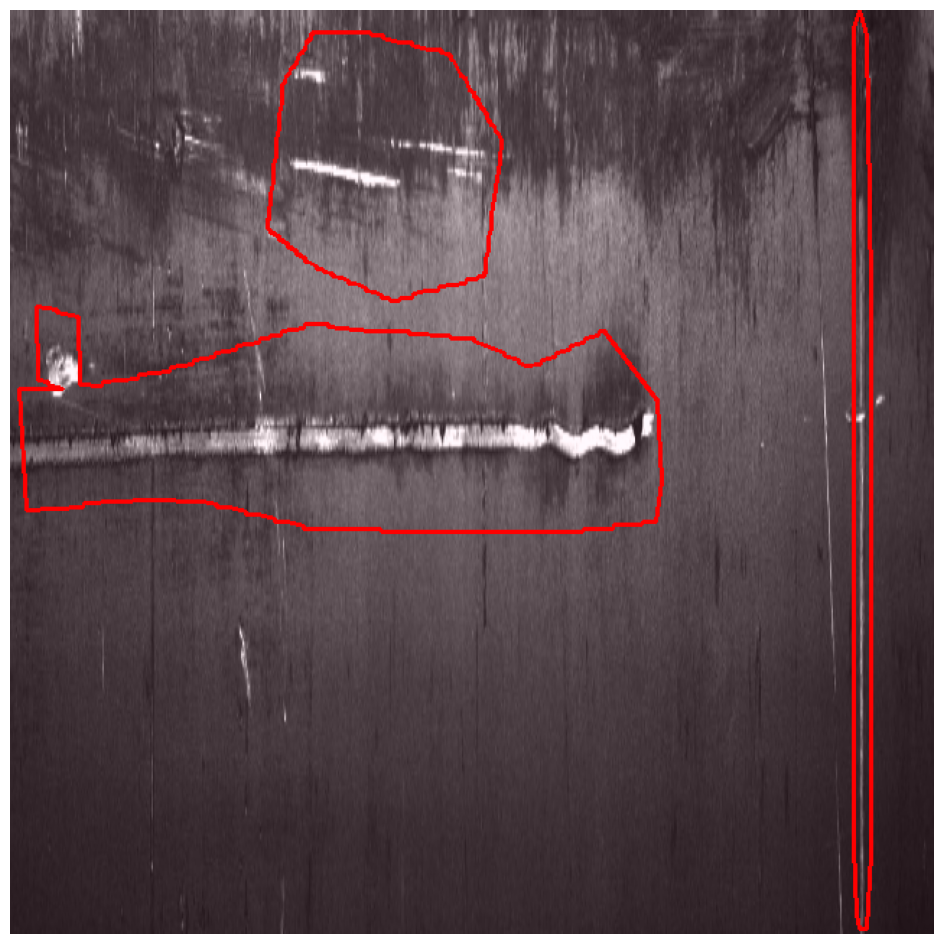

In [47]:
import albumentations as A  # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ ÏúÑÌïú Albumentations ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import cv2  # OpenCV ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏, Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ÏôÄ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ ÏûëÏóÖÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©

# ÌäπÏ†ï Ïù¥ÎØ∏ÏßÄÏùò Ìñâ ÏúÑÏπòÎ•º Í∞ÄÏ†∏Ïò§Îäî ÏΩîÎìú (Ï£ºÏÑù Ï≤òÎ¶¨Îêú Î∂ÄÎ∂Ñ)
# row_id = train_df_n.index.get_loc('d0fb25531.jpg')  # 'd0fb25531.jpg' ÌååÏùºÏùò Ïù∏Îç±Ïä§Î•º Í∏∞Î∞òÏúºÎ°ú Ìñâ IDÎ•º Í∞ÄÏ†∏Ïò¥
row_id = 2  # ÏàòÎèôÏúºÎ°ú Ìñâ IDÎ•º 1Î°ú ÏÑ§Ï†ï

# Ï£ºÏñ¥ÏßÑ Ìñâ IDÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(train_df_n)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï¥Îãπ ÎßàÏä§ÌÅ¨, ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ ÏùΩÏñ¥Ïò¥
fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df_n)

# Ï†ïÏùòÎêú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏(train_transform)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨Ïóê Ï¶ùÍ∞ï Ï†ÅÏö©
transformed = train_transform(image=image, masks=masks)  # Ïù¥ÎØ∏ÏßÄÎ•º Ï¶ùÍ∞ïÏãúÌÇ§Í≥† ÎßàÏä§ÌÅ¨ÏóêÎèÑ ÎèôÏùºÌïú Î≥ÄÌôòÏùÑ Ï†ÅÏö©
transformed_image = transformed['image']  # Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÏ∂ú
transformed_masks = transformed['masks']  # Ï¶ùÍ∞ïÎêú ÎßàÏä§ÌÅ¨Î•º Ï∂îÏ∂ú

# Ï¶ùÍ∞ïÎêú ÎßàÏä§ÌÅ¨Î•º Îã§Í∞ÅÌòï Ï¢åÌëú ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÍ≥†, Î≥ÄÌôòÎêú ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Î∞òÌôò
transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, class_labels)

# Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: Î≥ÄÌôòÎêú ÌÇ§Ìè¨Ïù∏Ìä∏Î•º Ï∂úÎ†•
# print(transformed_keypoints)

# Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄÏóê Î≥ÄÌôòÎêú Îã§Í∞ÅÌòï Ï¢åÌëúÎ•º Í∑∏Î†§ ÏãúÍ∞ÅÌôî
visualize(transformed_image, transformed_keypoints)


In [21]:
import os  # Ïö¥ÏòÅ Ï≤¥Ï†úÏôÄ ÏÉÅÌò∏ÏûëÏö©ÌïòÍ∏∞ ÏúÑÌïú os ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import shutil  # ÌååÏùº Î∞è ÎîîÎ†âÌÜ†Î¶¨ ÏûëÏóÖÏùÑ ÏúÑÌïú shutil ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

# 'images' ÎîîÎ†âÌÜ†Î¶¨Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ï°¥Ïû¨ÌïòÎ©¥ Ìï¥Îãπ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÇ≠Ï†ú
if os.path.isdir('images'):
    shutil.rmtree('images')  # 'images' ÎîîÎ†âÌÜ†Î¶¨ÏôÄ Í∑∏ ÏïàÏùò Î™®Îì† ÌååÏùº Î∞è ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÇ≠Ï†ú

# 'labels' ÎîîÎ†âÌÜ†Î¶¨Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ï°¥Ïû¨ÌïòÎ©¥ Ìï¥Îãπ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÇ≠Ï†ú
if os.path.isdir('labels'):
    shutil.rmtree('labels')  # 'labels' ÎîîÎ†âÌÜ†Î¶¨ÏôÄ Í∑∏ ÏïàÏùò Î™®Îì† ÌååÏùº Î∞è ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÇ≠Ï†ú

# # ÏÉàÎ°úÏö¥ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± Î™ÖÎ†πÏñ¥ Ïã§Ìñâ
# # 'images'ÎùºÎäî ÏÉàÎ°úÏö¥ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# !mkdir images 
# # 'labels'ÎùºÎäî ÏÉàÎ°úÏö¥ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# !mkdir labels  

# # ÌïôÏäµ(train) Î∞è Í≤ÄÏ¶ù(val) Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# # 'images' ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê 'train' ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# !mkdir images/train  
# # 'images' ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê 'val' ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# !mkdir images/val  
# # !mkdir test  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: ÌÖåÏä§Ìä∏(test) Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± Î™ÖÎ†πÏñ¥

# # 'labels' ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê 'train' ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# !mkdir labels/train  
# # 'labels' ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê 'val' ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
# !mkdir labels/val  
# # !mkdir test  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: ÌÖåÏä§Ìä∏(test) Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± Î™ÖÎ†πÏñ¥


In [46]:
import xml.etree.ElementTree as ET
import os

def save_masks_to_xml(filename, width, height, objects, output_dir):
    # <annotation> Î£®Ìä∏ ÏöîÏÜå ÏÉùÏÑ±
    annotation = ET.Element('annotation')
    
    # <folder> ÏöîÏÜå ÏÉùÏÑ±
    folder = ET.SubElement(annotation, 'folder')
    folder.text = 'cr'
    
    # <filename> ÏöîÏÜå ÏÉùÏÑ±
    filename_tag = ET.SubElement(annotation, 'filename')
    filename_tag.text = filename
    
    # <source> ÏöîÏÜå ÏÉùÏÑ±
    source = ET.SubElement(annotation, 'source')
    database = ET.SubElement(source, 'database')
    database.text = 'NEU-DET'
    
    # <size> ÏöîÏÜå ÏÉùÏÑ±
    size = ET.SubElement(annotation, 'size')
    width_tag = ET.SubElement(size, 'width')
    width_tag.text = str(width)
    height_tag = ET.SubElement(size, 'height')
    height_tag.text = str(height)
    depth_tag = ET.SubElement(size, 'depth')
    depth_tag.text = '1'  # ÌùëÎ∞± Ïù¥ÎØ∏ÏßÄÎ°ú Í∞ÄÏ†ï
    
    # <segmented> ÏöîÏÜå ÏÉùÏÑ±
    segmented = ET.SubElement(annotation, 'segmented')
    segmented.text = '0'
    
    # Í∞Å Í∞ùÏ≤¥Ïóê ÎåÄÌïú <object> ÏöîÏÜå ÏÉùÏÑ±
    for obj in objects:
        object_tag = ET.SubElement(annotation, 'object')
        name = ET.SubElement(object_tag, 'name')
        name.text = obj['name']  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
        pose = ET.SubElement(object_tag, 'pose')
        pose.text = 'Unspecified'
        truncated = ET.SubElement(object_tag, 'truncated')
        truncated.text = '1'
        difficult = ET.SubElement(object_tag, 'difficult')
        difficult.text = '0'
        
        # <bndbox> ÏöîÏÜå ÏÉùÏÑ±
        bndbox = ET.SubElement(object_tag, 'bndbox')
        xmin = ET.SubElement(bndbox, 'xmin')
        xmin.text = str(obj['bndbox']['xmin'])
        ymin = ET.SubElement(bndbox, 'ymin')
        ymin.text = str(obj['bndbox']['ymin'])
        xmax = ET.SubElement(bndbox, 'xmax')
        xmax.text = str(obj['bndbox']['xmax'])
        ymax = ET.SubElement(bndbox, 'ymax')
        ymax.text = str(obj['bndbox']['ymax'])
    
    # XML Ìä∏Î¶¨Î•º ÌååÏùºÎ°ú Ï†ÄÏû•
    tree = ET.ElementTree(annotation)
    output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.xml")
    tree.write(output_path, encoding='utf-8', xml_declaration=True)


In [22]:
def transform_element(transformM, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii=None):
    # Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨Ïóê Î≥ÄÌôò Ï†ÅÏö© (class_labels Ï†úÍ±∞)
    transformed = transformM(image=image, masks=masks)  # Î≥ÄÌôò Ï†ÅÏö©
    transformed_image = transformed['image']  # Î≥ÄÌôòÎêú Ïù¥ÎØ∏ÏßÄ Ï∂îÏ∂ú
    transformed_masks = transformed['masks']  # Î≥ÄÌôòÎêú ÎßàÏä§ÌÅ¨ Ï∂îÏ∂ú
    transformed_class_labels = class_labels  # class_labelsÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    
    transformed_name = onlyname
    if ii:
        transformed_name += '_'+str(ii)
    nn = os.path.basename(os.path.normpath(transformed_name))
    
    # Î≥ÄÌôòÎêú Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•
    cv2.imwrite(outdir1 + nn + '.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))  
    
    # ÎßàÏä§ÌÅ¨ Îç∞Ïù¥ÌÑ∞Î•º ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ï†ÄÏû• (Í∏∞Ï°¥ Î∞©Ïãù)
    out_file = open(outdir2 + nn + '.txt', 'w')  # Î≥ÄÌôòÎêú Î†àÏù¥Î∏îÏùÑ Ï†ÄÏû•Ìï† ÌÖçÏä§Ìä∏ ÌååÏùº Ïó¥Í∏∞

    # Î≥ÄÌôòÎêú ÎßàÏä§ÌÅ¨Î•º Îã§Í∞ÅÌòï Ï¢åÌëúÎ°ú Î≥ÄÌôòÌïòÍ≥†, Î≥ÄÌôòÎêú ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î Î∞òÌôò
    transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, transformed_class_labels)
    
    objects = []  # Í∞ùÏ≤¥ Ï†ïÎ≥¥Î•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
    
    for iii in range(len(transformed_keypoints)):
        kOut = transformed_keypoints[iii]
        clOut = transformed_class_labels[iii]
        
        if len(kOut) < 6:  # Ï¢åÌëúÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Î¨¥Ïãú
            continue
            
        text = str(clOut) + " " + " ".join([str(b) for b in kOut]) + '\n'
        out_file.write(text)
        
        # ÌÖçÏä§Ìä∏ ÌååÏùº Îøê ÏïÑÎãàÎùº XMLÏóê ÏÇ¨Ïö©Ìï† Í∞ùÏ≤¥ Ï†ïÎ≥¥ ÏàòÏßë
        xmin, ymin = min(kOut[::2]), min(kOut[1::2])
        xmax, ymax = max(kOut[::2]), max(kOut[1::2])
        
        objects.append({
            'name': clOut,  # ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î (Ïòà: 'crazing')
            'bndbox': {'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax}
        })
    
    out_file.close()

    # XML ÌååÏùºÎ°ú ÎßàÏä§ÌÅ¨ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
    save_masks_to_xml(nn + '.jpg', img_size[0], img_size[1], objects, outdir2)  # XMLÎ°ú Ï†ÄÏû•


In [23]:
outdir1 = "./images/train/"  # Î≥ÄÌôòÎêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï
outdir2 = "./labels/train/"  # Î≥ÄÌôòÎêú Î†àÏù¥Î∏î ÌååÏùºÏùÑ Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï

AUG_COUNT = 5  # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌöüÏàò ÏÑ§Ï†ï

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã(train_df_n)Ïùò Î™®Îì† ÌñâÏóê ÎåÄÌï¥ Î∞òÎ≥µ
for i in range(len(train_df_n)):
    # Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§ iÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(train_df_n)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï¥Îãπ ÎßàÏä§ÌÅ¨, ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ ÏùΩÏñ¥Ïò¥
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i, train_df_n)
    
    # Í≤ÄÏ¶ùÏö© Î≥ÄÌôò(val_transform)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ Î≥ÄÌôòÌïòÍ≥† Ï†ÄÏû•
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)
    
    # ÏÑ§Ï†ïÎêú Ï¶ùÍ∞ï ÌöüÏàò(AUG_COUNT)ÎßåÌÅº Î∞òÎ≥µ
    for ii in range(AUG_COUNT):
        # ÌïôÏäµÏö© Î≥ÄÌôò(train_transform)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ Î≥ÄÌôòÌïòÍ≥† Ï†ÄÏû•
        transform_element(train_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii)


In [24]:
outdir1 = "./images/val/"  # Î≥ÄÌôòÎêú Í≤ÄÏ¶ù Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï
outdir2 = "./labels/val/"  # Î≥ÄÌôòÎêú Í≤ÄÏ¶ù Î†àÏù¥Î∏î ÌååÏùºÏùÑ Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã(val_df_n)Ïùò Î™®Îì† ÌñâÏóê ÎåÄÌï¥ Î∞òÎ≥µ
for i in range(len(val_df_n)):
    # Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§ iÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(val_df_n)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï¥Îãπ ÎßàÏä§ÌÅ¨, ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ ÏùΩÏñ¥Ïò¥
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i, val_df_n)
    
    # Í≤ÄÏ¶ùÏö© Î≥ÄÌôò(val_transform)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ Î≥ÄÌôòÌïòÍ≥† Ï†ÄÏû•
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)


In [25]:
f = open("./train.yaml", "w")  # 'train.yaml' ÌååÏùºÏùÑ Ïì∞Í∏∞ Î™®ÎìúÎ°ú Ïó¥Í∏∞

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÎ°úÏôÄ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨Î•º YAML ÌååÏùºÏóê Í∏∞Î°ù
f.write('path: ' + init_dir + "\n")  # Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∏∞Î≥∏ Í≤ΩÎ°úÎ•º 'path' ÌÇ§Î°ú Ï∂îÍ∞Ä
f.write('train: images/train' + "\n")  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°úÎ•º 'train' ÌÇ§Î°ú Ï∂îÍ∞Ä
f.write('val: images/val' + "\n")  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°úÎ•º 'val' ÌÇ§Î°ú Ï∂îÍ∞Ä
# f.write('test: images/test' + "\n")  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°úÎ•º 'test' ÌÇ§Î°ú Ï∂îÍ∞Ä
# f.write('nc: 4' + "\n")  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: ÌÅ¥ÎûòÏä§ ÏàòÎ•º 'nc' ÌÇ§Î°ú Ï∂îÍ∞Ä

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ YAML ÌååÏùºÏóê Í∏∞Î°ù
f.write('names:' + "\n")  # ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ Ï†ïÏùòÌïòÎäî 'names' ÌÇ§ Ï∂îÍ∞Ä
f.write('  0: 0' + "\n")  # ÌÅ¥ÎûòÏä§ 0Ïùò Ïù¥Î¶ÑÏùÑ '0'ÏúºÎ°ú ÏÑ§Ï†ï
f.write('  1: 1' + "\n")  # ÌÅ¥ÎûòÏä§ 1Ïùò Ïù¥Î¶ÑÏùÑ '1'ÏúºÎ°ú ÏÑ§Ï†ï
f.write('  2: 2' + "\n")  # ÌÅ¥ÎûòÏä§ 2Ïùò Ïù¥Î¶ÑÏùÑ '2'ÏúºÎ°ú ÏÑ§Ï†ï
f.write('  3: 3' + "\n")  # ÌÅ¥ÎûòÏä§ 3Ïùò Ïù¥Î¶ÑÏùÑ '3'ÏúºÎ°ú ÏÑ§Ï†ï
f.write('  4: 4' + "\n")  # ÌÅ¥ÎûòÏä§ 4Ïùò Ïù¥Î¶ÑÏùÑ '4'ÏúºÎ°ú ÏÑ§Ï†ï
f.close()  # ÌååÏùºÏùÑ Îã´ÏïÑ Î≥ÄÍ≤Ω ÏÇ¨Ìï≠ÏùÑ Ï†ÄÏû•


In [26]:
a = """
# Ultralytics YOLO üöÄ, AGPL-3.0 license
# YOLOv8-seg instance segmentation model. For Usage examples see https://docs.ultralytics.com/tasks/segment

# Parameters
nc: 5  # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n-seg.yaml' will call yolov8-seg.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]  # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, Conv, [256, 3, 2]]  # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, Conv, [512, 3, 2]]  # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, Conv, [1024, 3, 2]]  # 7-P5/32
  - [-1, 3, C2f, [1024, True]]
  - [-1, 1, SPPF, [1024, 5]]  # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 6], 1, Concat, [1]]  # cat backbone P4
  - [-1, 3, C2f, [512]]  # 12

  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 4], 1, Concat, [1]]  # cat backbone P3
  - [-1, 3, C2f, [256]]  # 15 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 12], 1, Concat, [1]]  # cat head P4
  - [-1, 3, C2f, [512]]  # 18 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 9], 1, Concat, [1]]  # cat head P5
  - [-1, 3, C2f, [1024]]  # 21 (P5/32-large)

  - [[15, 18, 21], 1, Segment, [nc, 32, 256]]  # Segment(P3, P4, P5)"""

# 'yolov8-seg.yaml' ÌååÏùºÏùÑ Ïì∞Í∏∞ Î™®ÎìúÎ°ú Ïó¥Í∏∞
f = open("yolov8-seg.yaml", "w")
f.write(a)  # Î¨∏ÏûêÏó¥ 'a'Î•º ÌååÏùºÏóê ÏûëÏÑ±
f.close()  # ÌååÏùº Îã´Í∏∞

In [27]:
!wandb off

'wandb'ÔøΩÔøΩ(ÔøΩÔøΩ) ÔøΩÔøΩÔøΩÔøΩ ÔøΩ«¥ÔøΩ ÔøΩ‹∫ÔøΩ ÔøΩÔøΩÔøΩÔøΩ, ÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩ ÔøΩÔøΩ ÔøΩ÷¥ÔøΩ ÔøΩÔøΩÔøΩŒ±◊∑ÔøΩ, ÔøΩ«¥ÔøΩ
ÔøΩÔøΩƒ° ÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩ ÔøΩ∆¥’¥œ¥ÔøΩ.


In [28]:
# './runs/segment/train' ÎîîÎ†âÌÜ†Î¶¨Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
if os.path.isdir('./runs/segment/train'):
    # ÎîîÎ†âÌÜ†Î¶¨Í∞Ä Ï°¥Ïû¨ÌïòÎ©¥ Ìï¥Îãπ ÎîîÎ†âÌÜ†Î¶¨ÏôÄ Í∑∏ ÏïàÏùò Î™®Îì† ÌååÏùº Î∞è ÌïòÏúÑ ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÇ≠Ï†ú
    shutil.rmtree('./runs/segment/train')


In [29]:
from ultralytics import YOLO  # Ultralytics YOLO ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú YOLO ÌÅ¥ÎûòÏä§Î•º ÏûÑÌè¨Ìä∏

# 'yolov8n-seg.yaml' ÌååÏùºÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ YOLO Î™®Îç∏ Ï¥àÍ∏∞Ìôî
model = YOLO('yolov8n-seg.yaml')


In [30]:
# YOLO Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌï¥ 'train.yaml' ÌååÏùºÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†®ÏùÑ ÏãúÏûë
results = model.train(
    data='train.yaml',  # ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏôÄ ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥Î•º Ï†ïÏùòÌïú YAML ÌååÏùº Í≤ΩÎ°ú
    epochs=10,          # Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ¨ Ï¥ù ÏóêÌè¨ÌÅ¨ Ïàò ÏÑ§Ï†ï (30Ìöå Î∞òÎ≥µ ÌïôÏäµ)
    batch=32,           # Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Ìïú Î≤àÏùò ÌïôÏäµÏóêÏÑú ÏÇ¨Ïö©Ìï† ÏÉòÌîå Ïàò)
    pretrained=False    # ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπòÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† Î™®Îç∏ÏùÑ Ï≤òÏùåÎ∂ÄÌÑ∞ ÌïôÏäµ
)


Ultralytics YOLOv8.2.83  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=train.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.25M/6.25M [00:00<00:00, 16.7MB/s]


AMP: checks passed 


train: Scanning C:\Users\SSAFY\Desktop\ÌäπÌôî\yolo0905\labels\train... 29995 images, 333 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29995/29995 [00:12<00:00, 2316.80it/s]


train: New cache created: C:\Users\SSAFY\Desktop\\yolo0905\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\SSAFY\Desktop\ÌäπÌôî\yolo0905\labels\val... 667 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 667/667 [00:00<00:00, 1294.59it/s]

val: New cache created: C:\Users\SSAFY\Desktop\\yolo0905\labels\val.cache


Plotting labels to c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10       5.9G      3.161      4.607          4      3.104         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:14<00:00,  1.35s/it]


                   all        667       2438      0.281     0.0661     0.0203    0.00532      0.283     0.0672     0.0206    0.00497

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.61G      2.366      3.219       2.76      2.114         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:10<00:00,  1.02it/s]


                   all        667       2438      0.386      0.141     0.0736      0.024      0.387      0.134     0.0676     0.0222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.78G      2.159      3.041      2.535      1.935         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:12<00:00,  1.13s/it]


                   all        667       2438      0.424      0.159     0.0894     0.0296      0.376       0.17     0.0656     0.0216

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.79G      2.054      2.937      2.399      1.836         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:15<00:00,  1.40s/it]


                   all        667       2438      0.513      0.205      0.147     0.0495      0.488       0.19      0.122     0.0418

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.69G       1.96      2.837      2.281      1.766         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [08:37<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:14<00:00,  1.28s/it]


                   all        667       2438      0.485      0.214      0.147     0.0564      0.453      0.174      0.107     0.0369

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.84G      1.905      2.777      2.195      1.715         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:52<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:15<00:00,  1.37s/it]

                   all        667       2438      0.526      0.228       0.22     0.0885      0.499      0.201       0.18     0.0631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.52G      1.853      2.719      2.121      1.677         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [09:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:13<00:00,  1.25s/it]


                   all        667       2438      0.528      0.237      0.205     0.0766      0.494      0.209      0.158     0.0551

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.75G      1.819       2.67      2.067      1.652         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:48<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:11<00:00,  1.06s/it]

                   all        667       2438      0.546      0.253      0.248     0.0983      0.519      0.226      0.196     0.0704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.67G      1.781      2.632      2.007      1.626         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:50<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:13<00:00,  1.19s/it]


                   all        667       2438      0.532       0.29      0.258      0.103      0.536      0.233      0.209     0.0772

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10       5.7G      1.745      2.601      1.958      1.604         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 938/938 [07:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:11<00:00,  1.05s/it]

                   all        667       2438      0.282      0.279      0.252      0.104      0.275      0.218      0.199     0.0719



10 epochs completed in 1.380 hours.
Optimizer stripped from c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\weights\last.pt, 6.8MB
Optimizer stripped from c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\weights\best.pt, 6.8MB

Validating c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.2.83  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:11<00:00,  1.03s/it]


                   all        667       2438      0.534      0.289      0.259      0.103       0.54      0.231      0.208     0.0771
                     0         92        365      0.333      0.359      0.279     0.0966      0.338      0.266      0.221     0.0786
                     1         25         45          1     0.0346     0.0981     0.0245          1          0     0.0236    0.00588
                     2        525       1840      0.374      0.417      0.324      0.122      0.381      0.351      0.297      0.112
                     3         68        188      0.431      0.346      0.333      0.168      0.442      0.309      0.292      0.112
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train


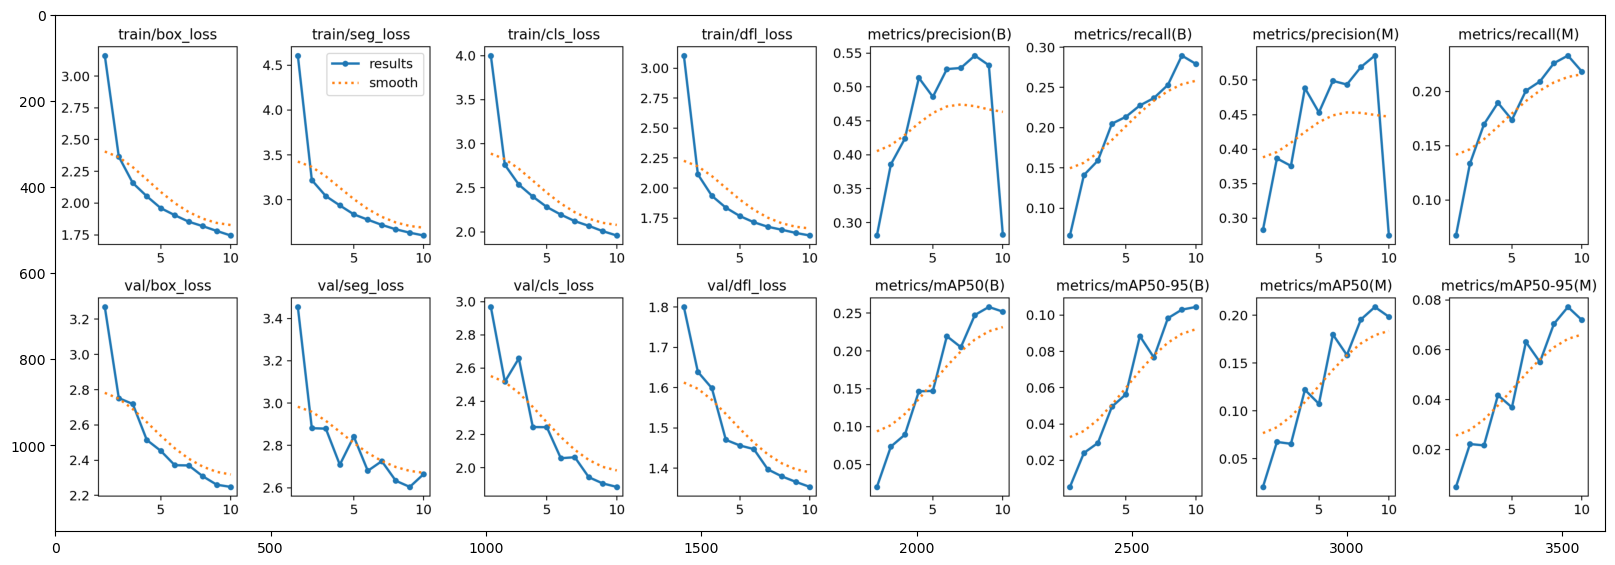

In [32]:
# './runs/segment/train/results.png' ÌååÏùºÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÍ≥† NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò

image = np.array(Image.open('../../YOLO/ultralytics/runs/segment/train/results.png'))
# image = np.array(Image.open('../YOLO/ultralytics/runs/segment/train/results.png'))
plt.figure(figsize=(20, 20))  # Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º 20x20Ïù∏ÏπòÎ°ú ÏÑ§Ï†ï
plt.imshow(image)  # Ïù¥ÎØ∏ÏßÄÎ•º ÌîåÎ°ØÏóê ÌëúÏãú


In [33]:
# https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def mask2rle(img):
    '''
    img: numpy array, 1 -> mask, 0 -> background
    Returns run length as string formatted
    '''
    # ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÑÏπò(transpose)ÌïòÍ≥†, 1Ï∞®ÏõêÏúºÎ°ú ÌèâÌÉÑÌôîÌïòÏó¨ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò
    pixels = img.T.flatten()
    
    # ÏãúÏûëÍ≥º ÎÅùÏóê 0ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Í≤ΩÍ≥Ñ Ï°∞Í±¥ÏùÑ Ï∂îÍ∞Ä
    pixels = np.concatenate([[0], pixels, [0]])
    
    # Ïó∞ÏÜçÎêú Í∞íÏù¥ Î∞îÎÄåÎäî ÏßÄÏ†ê(ÎßàÏä§ÌÅ¨Ïùò ÏãúÏûëÍ≥º ÎÅù ÏßÄÏ†ê)ÏùÑ Ï∞æÏùå
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    
    # RLE Ïù∏ÏΩîÎî©ÏùÑ ÏúÑÌï¥ ÏãúÏûë ÏßÄÏ†êÍ≥º Í∏∏Ïù¥Î°ú Î≥ÄÌôò
    runs[1::2] -= runs[::2]
    
    # RLE Í≤∞Í≥ºÎ•º Í≥µÎ∞±ÏúºÎ°ú Íµ¨Î∂ÑÎêú Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î∞òÌôò
    return ' '.join(str(x) for x in runs)


In [34]:
import glob  # ÌååÏùº Í≤ΩÎ°ú Î∞è Ïù¥Î¶Ñ Ìå®ÌÑ¥ÏùÑ Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌïú glob ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

# TEST_IMAGE_DATASET_PATH ÎîîÎ†âÌÜ†Î¶¨ÏóêÏÑú ÌôïÏû•ÏûêÍ∞Ä .jpgÏù∏ Î™®Îì† Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°úÎ•º Í∞ÄÏ†∏ÏôÄ Ï†ïÎ†¨
img_names = sorted(glob.glob(TEST_IMAGE_DATASET_PATH + "/*.jpg"))


In [35]:
import torch  # PyTorch ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏, Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌïòÍ≥† ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from ultralytics import YOLO  # Ultralytics YOLO ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú YOLO ÌÅ¥ÎûòÏä§Î•º ÏûÑÌè¨Ìä∏

# './runs/segment/train/weights/last.pt' ÌååÏùºÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ YOLO Î™®Îç∏ Î°úÎìú
model = YOLO('../../YOLO/ultralytics/runs/segment/train/weights/last.pt') 



image 1/1 c:\Users\SSAFY\Desktop\\yolo0905\severstal-steel-defect-detection\test_images\00513039a.jpg: 128x640 1 2, 90.4ms
Speed: 2.0ms preprocess, 90.4ms inference, 7.1ms postprocess per image at shape (1, 3, 128, 640)


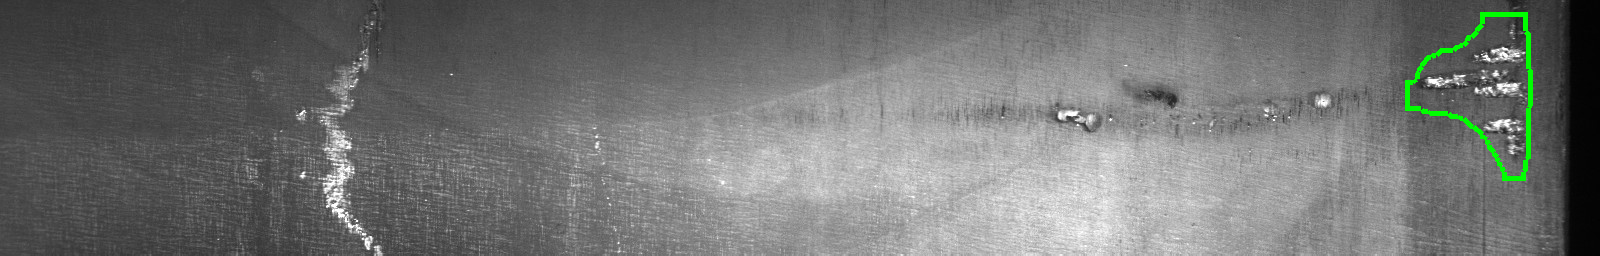

In [36]:
test_img = img_names[6]  # ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Î™©Î°ùÏóêÏÑú 7Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°úÎ•º ÏÑ†ÌÉù (Ïù∏Îç±Ïä§Îäî 0Î∂ÄÌÑ∞ ÏãúÏûë)
img = Image.open(test_img)  # PILÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ†ÌÉùÌïú ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º Ïó¥Í∏∞
draw = ImageDraw.Draw(img)  # Ïù¥ÎØ∏ÏßÄÏóê Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ ImageDraw Í∞ùÏ≤¥ ÏÉùÏÑ±

pred_results = model(test_img)  # Î°úÎìúÎêú YOLO Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ†ÌÉùÎêú Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ

# ÏòàÏ∏° Í≤∞Í≥ºÏóêÏÑú Ï≤´ Î≤àÏß∏ Í≤∞Í≥º(pred_results[0])Ïùò ÎßàÏä§ÌÅ¨Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
if pred_results[0].masks:
    masks = pred_results[0].masks.cpu()  # ÎßàÏä§ÌÅ¨ Îç∞Ïù¥ÌÑ∞Î•º GPUÏóêÏÑú CPUÎ°ú Ïù¥ÎèôÌïòÏó¨ ÏÇ¨Ïö©
    for mask in masks:  # Í∞Å ÎßàÏä§ÌÅ¨Ïóê ÎåÄÌï¥ Î∞òÎ≥µ
        # maskt = mask.data[0].numpy()  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: ÎßàÏä§ÌÅ¨ Îç∞Ïù¥ÌÑ∞Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
        for polygon in mask.xy:  # ÎßàÏä§ÌÅ¨Ïùò Îã§Í∞ÅÌòï Ï¢åÌëú(polygon)Î•º Î∞òÎ≥µ
            # mask_img = Image.fromarray(maskt,"I")  # Ï£ºÏÑù Ï≤òÎ¶¨Îêú ÏΩîÎìú: NumPy Î∞∞Ïó¥ÏùÑ Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôò
            draw.polygon(polygon, outline=(0, 255, 0), width=5)  # Îã§Í∞ÅÌòïÏùÑ Ï¥àÎ°ùÏÉâ(0, 255, 0)ÏúºÎ°ú Ïú§Í≥ΩÏÑ† Í∑∏Î¶¨Í∏∞, ÎëêÍªòÎäî 5ÌîΩÏÖÄ

img  # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
